# Lecture 03 - Demo Notebook

We recommend using Noto for this lecture tutorial, where we've already installed the dependencies of the pymer4 package and statsmodels.

We extended the data with extra features. The feature description is found [here](https://docs.google.com/spreadsheets/d/15UvkrJgTapWispb6tSjMTZh0yJooOsxQ3sWIhKjYM7I/edit?usp=sharing). 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Import the linear regression model class
from pymer4.models import Lm

# Import the lmm model class
from pymer4.models import Lmer

# Import Gaussian modeling
import statsmodels.formula.api as smf

# Data directory
DATA_DIR = "./../data"

In [2]:
# Parse the data

df = pd.read_csv('{}/aggregated_extended_fc.csv'.format(DATA_DIR))
df = df.fillna('NaN')
df = df.drop('week', axis=1)
list(df.columns)
display(df)

,user,ch_num_sessions,ch_time_in_prob_sum,ch_time_in_video_sum,ch_ratio_clicks_weekend_day,ch_total_clicks_weekend,ch_total_clicks_weekday,bo_delay_lecture,bo_reg_peak_dayhour,bo_reg_periodicity_m1,...,wa_num_subs_perc_correct,la_weekly_prop_watched_mean,la_weekly_prop_interrupted_mean,la_weekly_prop_interrupted_std,la_weekly_prop_replayed_mean,la_frequency_action_video_play,grade,gender,category,year
0,0,1.9,2334.4,2951.8,0.850000,16.8,38.1,55068.387500,51.462991,2.555903,...,0.203571,0.245714,0.024286,0.0,0.010000,0.179203,4.50,NaN,NaN,Y2-2018-19
1,1,3.4,1698.4,9227.8,0.567500,4.0,179.4,-2883.367738,129.051646,4.498836,...,0.649643,0.748868,0.074683,0.0,0.066456,0.332424,4.50,M,Suisse.Autres,Y2-2018-19
2,2,5.3,2340.6,10801.3,26.562274,94.6,129.2,10027.216667,127.164668,4.269685,...,0.365179,0.354487,0.026667,0.0,0.059915,0.284407,5.25,M,Suisse.PAM,Y2-2018-19
3,3,2.8,2737.1,8185.5,3.691250,13.5,46.4,27596.864484,29.033154,3.149808,...,0.291546,0.370000,0.014286,0.0,0.020000,0.108774,4.50,F,Suisse.Autres,Y2-2018-19
4,4,2.5,3787.3,7040.0,1.543889,58.4,64.9,-914.633333,89.824892,3.420637,...,0.033333,0.030000,0.000000,0.0,0.020000,0.199775,4.75,F,France,Y2-2018-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,293,3.5,8127.5,113.4,0.632304,28.9,20.6,0.000000,27.454438,4.264075,...,0.214440,0.000000,0.000000,0.0,0.000000,0.034080,5.25,M,France,Y3-2019-20
284,294,2.2,2452.4,4623.1,18.147762,36.4,71.3,16834.900000,63.426727,2.547980,...,0.190741,0.140530,0.011111,0.0,0.000000,0.186649,5.25,F,France,Y3-2019-20
285,296,0.9,1643.2,1932.4,0.000000,0.4,31.2,-12860.522222,17.205877,1.017576,...,0.075000,0.069231,0.023077,0.0,0.000000,0.028596,6.00,F,France,Y3-2019-20
286,297,1.4,2718.6,360.3,0.180000,2.0,15.3,0.000000,20.161160,1.428595,...,0.085714,0.000000,0.000000,0.0,0.000000,0.032353,5.00,M,Suisse.PAM,Y3-2019-20


### Linear Regression

We will fit a simple linear regression with the pymer4 library with one variable.

In [3]:
# Initialize linear regression model using 1 predictor (time_in_prob) and sample data
model = Lm("grade ~ mu_speed_playback_mean", data=df)

# Fit it
print(model.fit())

Formula: grade~mu_speed_playback_mean

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 288	 R^2: 0.019	 R^2_adj: 0.016

Log-likelihood: -463.538 	 AIC: 931.076	 BIC: 938.402

Fixed effects:

                        Estimate  2.5_ci  97.5_ci     SE   DF  T-stat  P-val  \
Intercept                  3.524   3.068    3.981  0.232  286  15.201  0.000   
mu_speed_playback_mean     0.555   0.095    1.015  0.234  286   2.377  0.018   

                        Sig  
Intercept               ***  
mu_speed_playback_mean    *  


Let's **visualize the fit** of our linear regression model.

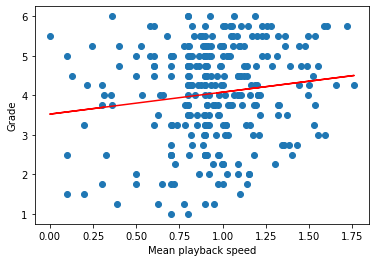

In [4]:
# fit a regression line
x_pred = df.mu_speed_playback_mean
y_pred = model.fits

plt.figure()
plt.scatter(df.mu_speed_playback_mean, df.grade)
plt.plot(x_pred,y_pred, color='red')
plt.xlabel("Mean playback speed")
plt.ylabel("Grade")
plt.show()

### Two-Variable Regression

Next, we will do a regression with **two variables**. Which of these variables has the larger influence on grade?

In [5]:
# Linear regression with two variables

# Initialize model using 2 predictor (time_in_problem) and sample data
regression_two_variables = Lm("grade ~ ch_time_in_prob_sum + wa_num_subs_perc_correct", data=df)

# Fit regression model
regression_two_variables.fit()
print(regression_two_variables.coefs)

Formula: grade~ch_time_in_prob_sum+wa_num_subs_perc_correct

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 288	 R^2: 0.110	 R^2_adj: 0.104

Log-likelihood: -449.516 	 AIC: 905.031	 BIC: 916.020

Fixed effects:

                          Estimate    2.5_ci   97.5_ci        SE   DF  \
Intercept                 3.410119  3.148091  3.672148  0.133123  285   
ch_time_in_prob_sum       0.000157  0.000094  0.000220  0.000032  285   
wa_num_subs_perc_correct  0.716132  0.035683  1.396581  0.345700  285   

                             T-stat     P-val  Sig  
Intercept                 25.616335  0.000000  ***  
ch_time_in_prob_sum        4.921856  0.000001  ***  
wa_num_subs_perc_correct   2.071542  0.039208    *  


The two variables have very different scales: one is time in seconds {0, inf} and one is percentage {0, 1}. Therefore, we cannot directly compare them.

To make the coefficients comparable, we will standardize them by computing the **z-score**.

In [6]:
# compute z-score for time in problem and percentage correct
df['time_in_prob_z'] = (df.ch_time_in_prob_sum - df.ch_time_in_prob_sum.mean())/df.ch_time_in_prob_sum.std()
df['percentage_correct_z'] = (df.wa_num_subs_perc_correct - df.wa_num_subs_perc_correct.mean())/df.wa_num_subs_perc_correct.std()

# re-compute the regression
# Initialize model using 2 predictor (time_in_problem) and sample data
regression_comparable = Lm("grade ~ time_in_prob_z + percentage_correct_z", data=df)

# fit the regression model
regression_comparable.fit()
print(regression_comparable.coefs)

Formula: grade~time_in_prob_z+percentage_correct_z

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 288	 R^2: 0.110	 R^2_adj: 0.104

Log-likelihood: -449.516 	 AIC: 905.031	 BIC: 916.020

Fixed effects:

                      Estimate    2.5_ci   97.5_ci        SE   DF     T-stat  \
Intercept             4.048611  3.914245  4.182978  0.068265  285  59.307699   
time_in_prob_z        0.346488  0.207923  0.485054  0.070398  285   4.921856   
percentage_correct_z  0.145832  0.007266  0.284398  0.070398  285   2.071542   

                         P-val  Sig  
Intercept             0.000000  ***  
time_in_prob_z        0.000001  ***  
percentage_correct_z  0.039208    *  


We observe that the **time in problem** attribute has a larger impact on grade than **percentage correct**.

Another option is to use a MinMax Scaling, i.e. we are not standardizing the features but normalizing them between 0 and 1. We don't need to apply the scaler to the percentage of correct solution as this features is naturally between 0 and 1.

In [8]:
scaler = MinMaxScaler()
scaler.fit((df['ch_time_in_prob_sum']).to_numpy().reshape(-1,1))
df['time_in_problem_norm'] = scaler.transform((df['ch_time_in_prob_sum']).to_numpy().reshape(-1,1))
df.head()

,user,ch_num_sessions,ch_time_in_prob_sum,ch_time_in_video_sum,ch_ratio_clicks_weekend_day,ch_total_clicks_weekend,ch_total_clicks_weekday,bo_delay_lecture,bo_reg_peak_dayhour,bo_reg_periodicity_m1,...,la_weekly_prop_interrupted_std,la_weekly_prop_replayed_mean,la_frequency_action_video_play,grade,gender,category,year,time_in_prob_z,percentage_correct_z,time_in_problem_norm
0,0,1.9,2334.4,2951.8,0.850000,16.8,38.1,55068.387500,51.462991,2.555903,...,0.0,0.010000,0.179203,4.50,NaN,NaN,Y2-2018-19,-0.212453,-0.354933,0.209856
1,1,3.4,1698.4,9227.8,0.567500,4.0,179.4,-2883.367738,129.051646,4.498836,...,0.0,0.066456,0.332424,4.50,M,Suisse.Autres,Y2-2018-19,-0.501291,1.835571,0.152682
2,2,5.3,2340.6,10801.3,26.562274,94.6,129.2,10027.216667,127.164668,4.269685,...,0.0,0.059915,0.284407,5.25,M,Suisse.PAM,Y2-2018-19,-0.209637,0.438664,0.210414
3,3,2.8,2737.1,8185.5,3.691250,13.5,46.4,27596.864484,29.033154,3.149808,...,0.0,0.020000,0.108774,4.50,F,Suisse.Autres,Y2-2018-19,-0.029567,0.077082,0.246058
4,4,2.5,3787.3,7040.0,1.543889,58.4,64.9,-914.633333,89.824892,3.420637,...,0.0,0.020000,0.199775,4.75,F,France,Y2-2018-19,0.447380,-1.190914,0.340468


In [9]:
# re-compute the regression
# Initialize model using 2 predictor (time_in_problem) and sample data
regression_scaled = Lm("grade ~ time_in_problem_norm + wa_num_subs_perc_correct", data=df)

# fit the regression model
regression_scaled.fit()
print(regression_scaled.coefs)

Formula: grade~time_in_problem_norm+wa_num_subs_perc_correct

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 288	 R^2: 0.110	 R^2_adj: 0.104

Log-likelihood: -449.516 	 AIC: 905.031	 BIC: 916.020

Fixed effects:

                          Estimate    2.5_ci   97.5_ci        SE   DF  \
Intercept                 3.410119  3.148091  3.672148  0.133123  285   
time_in_problem_norm      1.750411  1.050396  2.450426  0.355640  285   
wa_num_subs_perc_correct  0.716132  0.035683  1.396581  0.345700  285   

                             T-stat     P-val  Sig  
Intercept                 25.616335  0.000000  ***  
time_in_problem_norm       4.921856  0.000001  ***  
wa_num_subs_perc_correct   2.071542  0.039208    *  


### Generalized Linear Models

Now that we have successfully experimented with regression, we are interested in predicting whether a student will pass/fail a course.

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# compute pass/fail label
df['passed'] = df.grade >= 4
df['passed'] = df['passed'].replace(True,1)
df['passed'] = df['passed'].replace(False,0)

# logistic regression
mod1 = smf.glm(formula='passed ~ wa_num_subs_perc_correct', data=df, family=sm.families.Binomial()).fit()
print(mod1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 passed   No. Observations:                  288
Model:                            GLM   Df Residuals:                      286
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -193.28
Date:                Fri, 04 Mar 2022   Deviance:                       386.57
Time:                        21:55:54   Pearson chi2:                     288.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.003213
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Mixed Effect Models

Sometimes, we might deal with correlated samples. For example, our data set contains students from different origin. We might hypothesize that students having a similar background (category) behave more similar as they come from the same school/education system.  

We will therefore now run a model with a **random intercept**, i.e. we will assume that the intercept depends on the category the students are in.

In [12]:
# Initialize model instance using 1 predictor with random intercepts and slopes
model = Lmer("passed ~ (1|category) + wa_num_subs_perc_correct", data=df, family='binomial')

# Fit it
print(model.fit())

Formula: passed~(1|category)+wa_num_subs_perc_correct

Family: binomial	 Inference: parametric

Number of observations: 288	 Groups: {'category': 5.0}

Log-likelihood: -191.991 	 AIC: 389.982

Random effects:

                 Name   Var    Std
category  (Intercept)  0.08  0.283

No random effect correlations specified

Fixed effects:

                          Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  \
(Intercept)                  0.184  -0.300    0.667  0.247  1.201      0.741   
wa_num_subs_perc_correct     0.661  -0.526    1.848  0.606  1.937      0.591   

                          OR_97.5_ci   Prob  Prob_2.5_ci  Prob_97.5_ci  \
(Intercept)                    1.949  0.546        0.426         0.661   
wa_num_subs_perc_correct       6.348  0.660        0.372         0.864   

                          Z-stat  P-val Sig  
(Intercept)                0.744  0.457      
wa_num_subs_perc_correct   1.092  0.275      



### Regression for Time-Series Data

Next, we analyze the data over time as we are dealing with **time series** interactions. First, we create a dataframe containing information about the user.

In [13]:
# parse the necessary data frames
df_ui = (df.loc[:,['user','grade','gender','category','year']]).copy()

# compute pass/fail label
df_ui['passed'] = df_ui.loc[:,'grade'] >= 4
df_ui.loc[:,'passed'] = df_ui.loc[:,'passed'].replace(True,1)
df_ui.loc[:,'passed'] = df_ui.loc[:,'passed'].replace(False,0)
display(df_ui)

,user,grade,gender,category,year,passed
0,0,4.50,NaN,NaN,Y2-2018-19,1
1,1,4.50,M,Suisse.Autres,Y2-2018-19,1
2,2,5.25,M,Suisse.PAM,Y2-2018-19,1
3,3,4.50,F,Suisse.Autres,Y2-2018-19,1
4,4,4.75,F,France,Y2-2018-19,1
...,...,...,...,...,...,...
283,293,5.25,M,France,Y3-2019-20,1
284,294,5.25,F,France,Y3-2019-20,1
285,296,6.00,F,France,Y3-2019-20,1
286,297,5.00,M,Suisse.PAM,Y3-2019-20,1


Next, we parse the the data.

In [29]:
df_byweek = pd.read_csv('{}/time_series_extended_fc.csv'.format(DATA_DIR))
display(df_byweek)

,week,user,ch_num_sessions,ch_time_in_prob_sum,ch_time_in_video_sum,ch_ratio_clicks_weekend_day,ch_total_clicks_weekend,ch_total_clicks_weekday,bo_delay_lecture,bo_reg_peak_dayhour,...,mu_frequency_action_relative_video_pause,wa_num_subs,wa_num_subs_correct,wa_num_subs_avg,wa_num_subs_perc_correct,la_weekly_prop_watched_mean,la_weekly_prop_interrupted_mean,la_weekly_prop_interrupted_std,la_weekly_prop_replayed_mean,la_frequency_action_video_play
0,0,0,4.0,5682.0,6417.0,8.500000,12.0,102.0,-24339.200000,59.161974,...,0.315217,8.0,4.0,1.333333,0.500000,0.5,0.1,0.0,0.1,0.298246
1,0,1,7.0,326.0,15525.0,5.675000,40.0,227.0,4492.833333,79.842929,...,0.345528,7.0,4.0,1.400000,0.571429,0.6,0.1,0.0,0.0,0.400749
2,0,2,4.0,1224.0,12209.0,258.000000,1.0,258.0,-8998.000000,269.258828,...,0.230415,13.0,8.0,1.300000,0.615385,0.6,0.0,0.0,0.0,0.370656
3,0,3,11.0,3517.0,26500.0,14.100000,10.0,141.0,-33102.111111,25.449179,...,0.301887,17.0,10.0,1.545455,0.588235,0.9,0.0,0.0,0.1,0.258278
4,0,4,4.0,1294.0,12037.0,0.328571,140.0,46.0,-9146.333333,66.949065,...,0.267606,3.0,1.0,3.000000,0.333333,0.3,0.0,0.0,0.2,0.252688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,9,293,1.0,0.0,0.0,0.000000,14.0,0.0,0.000000,25.797842,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
2876,9,294,1.0,2263.0,0.0,0.000000,0.0,8.0,0.000000,19.608986,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
2877,9,296,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
2878,9,297,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000


In [34]:
df_byuser = df_byweek.sort_values(by=['user', 'week']).reset_index(drop=True)

Next, we clean the data to ensure minimum acitivity: we require users to have at least one click each week (can be on the weekend or on the weekdays) during the first part of the course.

In [75]:
#find all users weeks with 0 clicks on weekends and 0 clicks on weekdays during the last weeks of the semester
df_first = df_byuser[df_byuser.week < 5]
rows = np.where(np.logical_and(df_first.ch_total_clicks_weekend==0, df_first.ch_total_clicks_weekday == 0).to_numpy())[0]
df_zero = df_first.iloc[rows,:]
dropusers = np.unique(df_zero.user)

df_byuser = df_byuser[df_byuser.user.isin(dropusers)==False]
display(df_byuser)

,week,user,ch_num_sessions,ch_time_in_prob_sum,ch_time_in_video_sum,ch_ratio_clicks_weekend_day,ch_total_clicks_weekend,ch_total_clicks_weekday,bo_delay_lecture,bo_reg_peak_dayhour,...,mu_frequency_action_relative_video_pause,wa_num_subs,wa_num_subs_correct,wa_num_subs_avg,wa_num_subs_perc_correct,la_weekly_prop_watched_mean,la_weekly_prop_interrupted_mean,la_weekly_prop_interrupted_std,la_weekly_prop_replayed_mean,la_frequency_action_video_play
10,0,1,7.0,326.0,15525.0,5.675000,40.0,227.0,4492.833333,79.842929,...,0.345528,7.0,4.0,1.400000,0.571429,0.600000,0.100000,0.0,0.000000,0.400749
11,1,1,4.0,350.0,8411.0,0.000000,0.0,207.0,14188.375000,83.811517,...,0.405405,9.0,6.0,1.500000,0.666667,0.800000,0.000000,0.0,0.100000,0.391304
12,2,1,5.0,4577.0,8691.0,0.000000,0.0,167.0,159044.666667,134.197784,...,0.430657,9.0,9.0,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.359281
13,3,1,4.0,259.0,12055.0,0.000000,0.0,239.0,-44816.600000,198.002219,...,0.374429,9.0,7.0,1.285714,0.777778,0.769231,0.000000,0.0,0.153846,0.359833
14,4,1,3.0,480.0,13235.0,0.000000,0.0,197.0,-37297.285714,101.712755,...,0.413408,8.0,7.0,1.000000,0.875000,1.000000,0.285714,0.0,0.285714,0.390863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,5,293,2.0,9315.0,0.0,0.513514,37.0,19.0,0.000000,50.837230,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2836,6,293,3.0,86.0,549.0,4.333333,3.0,13.0,0.000000,22.565604,...,0.384615,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.312500
2837,7,293,3.0,3675.0,0.0,0.000000,0.0,41.0,0.000000,29.120580,...,0.000000,19.0,12.0,1.583333,0.631579,0.000000,0.000000,0.0,0.000000,0.000000
2838,8,293,5.0,10956.0,0.0,0.000000,0.0,53.0,0.000000,20.598358,...,0.000000,13.0,11.0,1.181818,0.846154,0.000000,0.000000,0.0,0.000000,0.000000


We can now run a model over the time series data of the students. In our first task, we are interested in predicting course grade early on during the semester. This type of information can be useful for an instructor in order to be able to provide intervention to struggling students. We will use again the category as a random effect.
We will need to train a separate model for each week (i.e. predicting after 1 week of the course, after 2 weeks of the course, after 3 weeks, etc.). However, we will use the same equation for all models.

**Step 1**: We will write a function that aggregates the features for all weeks.

In [70]:
def aggregate_features(df_ui, df_byuser, week_nr):

    df_weeknr = df_byuser[df_byuser['week'] < week_nr]
    df_return = df_weeknr.groupby(['user']).mean()
    df_return['user'] = df_return.index
    
    # Return df with aggregated features
    df_return = df_return.set_index('user').join(df_ui.set_index('user'))
    df_return.reset_index()
    
    return df_return

**Step 2**: We will split the data into a training and test set (20% users in the test set, stratified by pass/fail label). In our case, **data stratification** refers to choosing a sample with the same ratio of pass/fail as the initial dataset, so our training set and our test set are both representative of our original population. If you are interested, you can read more about [stratifying test sets here](https://www.baeldung.com/cs/ml-stratified-sampling).

In [76]:
# perform train/test split
df_week5 = aggregate_features(df_ui, df_byuser, 5)
df_train5, df_test5 = train_test_split(df_week5, test_size=0.2, random_state=0,  stratify=df_week5['passed'])

df_week10 = aggregate_features(df_ui, df_byuser, 10)
df_train10, df_test10 = train_test_split(df_week10, test_size=0.2, random_state=0,  stratify=df_week10['passed'])

**Step 3**: We will now train our model on the training data for 5 and 10 weeks.

In [83]:
# Train a multi-regression model for weeks 4, 7, and 10
# Initialize model instance using 1 predictor with random intercepts and slopes
model5 = Lmer("passed ~ (1|category) +  wa_num_subs_perc_correct", data=df_train5, family='binomial')
model10 = Lmer("passed ~ (1|category) +  wa_num_subs_perc_correct", data=df_train10, family='binomial')

# Fit the models
print(model5.fit())
print(model10.fit())

Formula: passed~(1|category)+wa_num_subs_perc_correct

Family: binomial	 Inference: parametric

Number of observations: 187	 Groups: {'category': 5.0}

Log-likelihood: -125.311 	 AIC: 256.623

Random effects:

                 Name    Var    Std
category  (Intercept)  0.026  0.161

No random effect correlations specified

Fixed effects:

                          Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  \
(Intercept)                  0.516  -0.078    1.111  0.303  1.676      0.925   
wa_num_subs_perc_correct    -0.287  -1.551    0.976  0.645  0.750      0.212   

                          OR_97.5_ci   Prob  Prob_2.5_ci  Prob_97.5_ci  \
(Intercept)                    3.036  0.626        0.481         0.752   
wa_num_subs_perc_correct       2.655  0.429        0.175         0.726   

                          Z-stat  P-val Sig  
(Intercept)                1.703  0.089   .  
wa_num_subs_perc_correct  -0.445  0.656      
Formula: passed~(1|category)+wa_num_subs_perc_correct

Fam

**Step 4**: We predict on the test data and check the Accuracy

In [84]:
# predict on the test data for weeks 5, 10
predictions5 = model5.predict(df_test5, verify_predictions=False)
rmse5 = mean_squared_error(df_test5['passed'], predictions5, squared=False)

predictions10 = model10.predict(df_test10, verify_predictions=False)
rmse10 = mean_squared_error(df_test10['passed'], predictions10, squared=False)

print(rmse5)
print(rmse10)

0.4913802057143117
0.4840872132280756


### Predicting inter-week student performance

For the last experiment, we are interested in predicting percentage correct of a user in the next week. E.g., based on data from week 1, we predict week 2. Based on data from week 1 and 2, we predict week 3, etc. We need to re-format the data frame such that we have the outcome measure of every week as a separate column in the same dataframe.

In [113]:
# Shift percentage correct
df_byuser['percentage_correct_next'] = df_byuser.groupby('user')['wa_num_subs_perc_correct'].shift(-1)
df_byuser.drop('wa_num_subs_perc_correct',axis=1)
loc_outcome = df_byuser.columns.get_loc('percentage_correct_next')

In [114]:
def aggregate_weeks(df,loc):
    """
    We aggregate the data of the previous weeks
    """
    df_without = df.iloc[:,:loc]
    df_with = df.loc[:,['user','week','percentage_correct_next']]
    week_num = 0
    df_weeks = df_without[df_without['week']<=week_num].groupby('user', as_index=False).mean()
    df_weeks['week'] = week_num

    max_weeks = df_without['week'].max()
    for week_num in range(1, 1 + max_weeks):
        df_aux = df_without[df_without['week']<=week_num].groupby('user', as_index=False).mean()
        df_aux['week'] = week_num
        df_weeks = df_weeks.append(df_aux)
        
    df_weeks = df_weeks.set_index(['user','week']).join(df_with.set_index(['user','week']))
    df_weeks = df_weeks.reset_index()

    return df_weeks

In [115]:
df_weeks = aggregate_weeks(df_byuser,loc_outcome)
df_users = df_weeks.sort_values(by=['user', 'week']).reset_index(drop=True)
df_users.head()

,user,week,ch_num_sessions,ch_time_in_prob_sum,ch_time_in_video_sum,ch_ratio_clicks_weekend_day,ch_total_clicks_weekend,ch_total_clicks_weekday,bo_delay_lecture,bo_reg_peak_dayhour,...,wa_num_subs_correct,wa_num_subs_avg,wa_num_subs_perc_correct,la_weekly_prop_watched_mean,la_weekly_prop_interrupted_mean,la_weekly_prop_interrupted_std,la_weekly_prop_replayed_mean,la_frequency_action_video_play,submissions_wrong,percentage_correct_next
0,1,0,7.000000,326.0,15525.000000,5.675000,40.000000,227.000000,4492.833333,79.842929,...,4.000000,1.400000,0.571429,0.600000,0.100000,0.0,0.000000,0.400749,3.0,0.666667
1,1,1,5.500000,338.0,11968.000000,2.837500,20.000000,217.000000,9340.604167,81.827223,...,5.000000,1.450000,0.619048,0.700000,0.050000,0.0,0.050000,0.396027,3.0,1.000000
2,1,2,5.333333,1751.0,10875.666667,1.891667,13.333333,200.333333,59241.958333,99.284077,...,6.333333,1.300000,0.746032,0.800000,0.033333,0.0,0.033333,0.383778,2.0,0.777778
3,1,3,5.000000,1378.0,11170.500000,1.418750,10.000000,210.000000,33227.318750,123.963612,...,6.500000,1.296429,0.753968,0.792308,0.025000,0.0,0.063462,0.377792,2.0,0.875000
4,1,4,4.600000,1198.4,11583.400000,1.135000,8.000000,207.400000,19122.397857,119.513441,...,6.600000,1.237143,0.778175,0.833846,0.077143,0.0,0.107912,0.380406,1.8,0.583333


We can now directly feed the dataframe into our regression model with the following formula: 

```percentage_correct_next ~ (1|week) + ch_time_in_prob_sum```



In [116]:
df_ex = df_weeks.sort_values('week')
df_ex = df_ex[~df_ex['percentage_correct_next'].isna()]
df_train, df_test = train_test_split(df_ex, test_size=0.2, random_state=0, shuffle=False)

In [117]:
# Build the model
model = Lmer("percentage_correct_next ~ (1|week) + ch_time_in_prob_sum", data=df_train, family='gaussian')

# Fit the models
print(model.fit())
# Predict and compute the rmse

predictions = model.predict(df_test, verify_predictions=False)
mean_squared_error(df_test['percentage_correct_next'], predictions, squared=False)


Formula: percentage_correct_next~(1|week)+ch_time_in_prob_sum

Family: gaussian	 Inference: parametric

Number of observations: 1684	 Groups: {'week': 8.0}

Log-likelihood: -641.578 	 AIC: 1283.157

Random effects:

                 Name    Var    Std
week      (Intercept)  0.001  0.029
Residual               0.123  0.350

No random effect correlations specified

Fixed effects:

                     Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  \
(Intercept)             0.336   0.302     0.37  0.017    18.593  19.411   
ch_time_in_prob_sum     0.000  -0.000     0.00  0.000  1679.495   1.576   

                     P-val  Sig  
(Intercept)          0.000  ***  
ch_time_in_prob_sum  0.115       


0.3714562657361032

Next, we build a model with different features as well as a randome effect for user.

In [118]:
# Compute submissions wrong
df_byuser['submissions_wrong'] = df_byuser['wa_num_subs'] - df_byuser['wa_num_subs_correct']

# Train the new model

# Predict and compute the RMSE
# Up to know 

# Train the model
model = Lmer("percentage_correct_next ~ (1|user) + submissions_wrong + wa_num_subs_correct", data=df_train, family='gaussian')

# Fit the models
print(model.fit())
# Predict and compute the rmse

predictions = model.predict(df_test, verify_predictions=False)
print(mean_squared_error(df_test['percentage_correct_next'], predictions, squared=False))

Formula: percentage_correct_next~(1|user)+submissions_wrong+wa_num_subs_correct

Family: gaussian	 Inference: parametric

Number of observations: 1684	 Groups: {'user': 234.0}

Log-likelihood: -406.466 	 AIC: 812.933

Random effects:

                 Name    Var    Std
user      (Intercept)  0.025  0.159
Residual               0.079  0.282

No random effect correlations specified

Fixed effects:

                     Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  \
(Intercept)             0.224   0.190    0.259  0.018   262.048  12.657   
submissions_wrong       0.010   0.004    0.017  0.004  1109.375   2.958   
wa_num_subs_correct     0.026   0.017    0.036  0.005   669.988   5.546   

                     P-val  Sig  
(Intercept)          0.000  ***  
submissions_wrong    0.003   **  
wa_num_subs_correct  0.000  ***  
0.36920528793937574
